# Практическая работа №3: Регрессионный анализ
Выполнил студент гр. 1375 Гаврилов Матвей. Вариант №8

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения

1. Регрессионная модель:
$$\mathbb{E}\left(Y|z\right) = f_{\theta}(z)$$

2. Линейная регрессионная модель:
$$\mathbb{E}_{\theta}\left(Y|z\right) = x(z)^{\intercal}\vec{\beta}$$

* $x(z)$ - вектор регрессоров, однозначно зависящий от $z$(ковариата).

3. Альтернативная форма записи модели линейной регрессии: $Y = X^{\intercal}\vec{\beta} + \epsilon$ 
* $\mathbb{E}_{\theta}\epsilon = 0$
* $\mathrm{Var}_{\theta}\epsilon = \sigma^2E$

4. МНК-оценка:
$$\mathrm{RSS}(\beta) = ||Y - X^{\intercal}\beta||^2 = \left(Y - X^{\intercal}\beta\right)^{\intercal}\left(Y - X^{\intercal}\beta\right) \rightarrow \min_{\beta}$$

5. Решение системы нормальных уравнений в регулярном случае: $\hat{\beta} = \left(XX^{\intercal}\right)^{-1}XY$

6. Оценка параметра $\sigma^2$: $s^2 = \large \frac{\mathrm{SSe}}{n - r} \normalsize = \large \frac{\mathrm{RSS}(\hat{\beta})}{n - r}$ - несмещённая оценка дисперсии
* $r$ - ранг матрицы $X$

7. Линейная функция параметра:
$$\psi(\beta) = C^{\intercal}\beta$$

8. Функция параметра $\psi(\beta)$ допускает несмещённое оценивание(ДНО), если
$$\exists L(Y) = BY: \forall \beta\mathbb{E}_{\beta}L(Y) = C^{\intercal}\beta$$

9. Теорема Гаусса-Маркова
В модели линейной регрессии любая ДНО-функция параметра $\psi = C^{\intercal}\beta$ , $C = \begin{pmatrix} c_1, & \ldots , & c_m \end{pmatrix}^{\intercal}$ имеет НРМД-оценку $\hat{\psi}$. Эта оценка единственная в классе линейных несмещённых оценок и равна:
$$\hat{\psi} = \sum \limits_{j = 1}^m c_j \hat{\beta_j}$$

* $\hat{\beta}$ - произвольное решение системы нормальных уравнений.

10. Доверительный интервал уровня доверия $1 - \alpha$:
$$\left[\widehat{\psi} - x_{\alpha}s\sqrt{b}, \widehat{\psi} + x_{\alpha}s\sqrt{b}\right] \ni \psi$$

* $x_{\alpha}: \mathrm{S}_{n - r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$ - квантиль
* $\large \frac{\hat{\psi} - \psi}{s \sqrt{b}} \normalsize \sim S_{n -r}$ - распределение
* $b_{\psi} = C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$ - элемент дисперсии оценки

11. Доверительный эллипосид уровня доверия $1 - \alpha$ функции параметра $\psi$:
$$A_{\alpha} = \left\{\vec{x}: \left(\vec{x} - \hat{\psi}\right)^{\intercal}B^{-1}\left(\vec{x} - \hat{\psi}\right) \leq qs^2x_{\alpha}\right\}$$
* $\large \frac{\left(\widehat{\psi} - \psi\right)^{\intercal}B^{-1}\left(\widehat{\psi} - \psi\right)}{qs^2} \normalsize \sim \mathcal{F}_{q, n - r}$ - распределение
* $x_{\alpha}: \mathrm{F}_{q, n - r}(x_{\alpha}) = 1 - \alpha$ - квантиль
* $B = C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$

12. $\mathbb{F}$ - статистика:
$$\mathbb{F} = \frac{SS_н}{q} \cdot \frac{n - r}{SS_e} \sim \mathcal{F}_{q, n - r}$$

* $\mathrm{SS}_H = \mathrm{RSS}(\hat{\beta}_H) - \mathrm{RSS}(\hat{\beta})$ 
* $\hat{\beta}_H$ - МНК-оценка параметра при выполнении основной гипотезы 
* $\mathrm{SSe} = \mathrm{RSS}(\hat{\beta}) = s^2(n - r)$

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной $Y$ от переменной $X$. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


In [1]:
import numpy as np

alpha = 0.01
h = 2.8

Y = [6.30, 2.09, 5.25, 19.36, 13.16, 13.96, 15.74, 12.99, 5.11, 14.15, 12.06, 17.98, 14.8, 14.55, 6.23, 5.76, 8.36, 5.6, 5.48, 10.52, 1.70, 16.69, 12.93, 20.63, 17.82, 16.71, 9.11, 9.44, 20.59, 15.41, 16.86, 18.96, 19.97, 2.62, 7.18, 17.40, 27.56, 8.78, 12.08, 1.77, 4.76, 15.57, 4.00, 12.10, 22.02, 9.29, 17.78, 7.06, 23.89, 12.27]
X = [5, 4, 6, 4, 5, 5, 5, 5, 3, 3, 6, 5, 8, 6, 3, 5, 3, 5, 4, 4, 3, 5, 6, 6, 4, 4, 6, 4, 5, 6, 5, 4, 7, 2, 5, 4, 6, 5, 5, 6, 3, 4, 6, 6, 6, 5, 5, 4, 4, 4]

1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить метод наименьшего квадрата оценки параметров сдвига  $\beta_0$ и масштаба  $\beta_1$ . Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

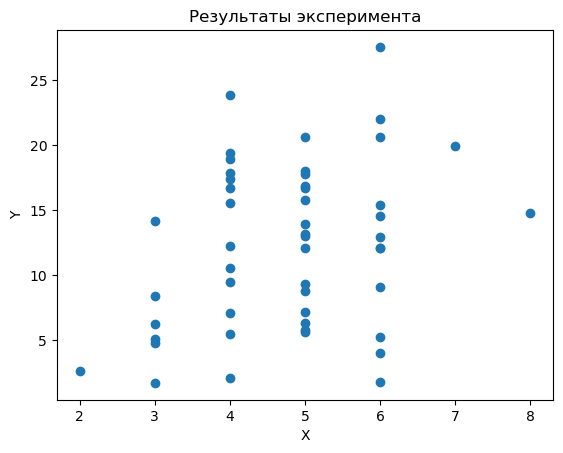

In [2]:
import matplotlib.pyplot as plt

plt.title('Результаты эксперимента')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X, Y)
plt.show()


Линейная регрессионная модель переменной $Y$ по переменной $X$:

$Y = \beta_0 + \beta_1X + \varepsilon$ 

 $ X X^{\intercal} \beta = X Y \Rightarrow \hat{\beta} = (X X^{\intercal})^{-1} XY $

In [3]:
import numpy.linalg as la
Xm = np.array([[1]*50, X])

beta = np.dot(la.inv(np.dot(Xm, Xm.transpose())), np.dot(Xm, Y))

print(round(beta[0], 10))
print(round(beta[1], 10))

4.4829046369
1.6244969379


$ \hat{\beta} = \left(\begin{array}{c} \hat\beta_0 \\ \hat\beta_1 \end{array} \right) = \left(\begin{array}{c} 4.4829046369 \\ 1.6244969379 \end{array} \right) \Rightarrow Y \approx 4.4829046369 + 1.624496937X$

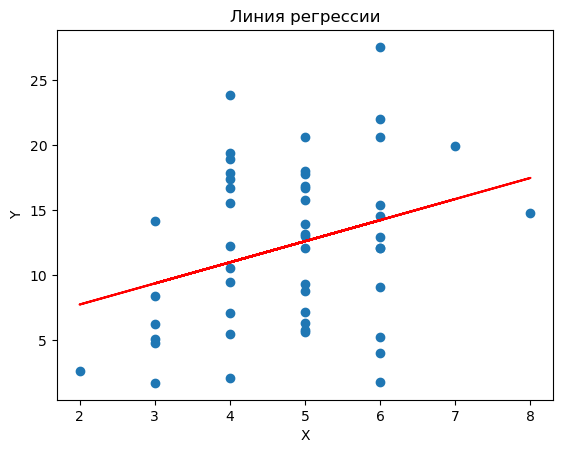

In [4]:
plt.title('Линия регрессии')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X, Y)
plt.plot(X, np.dot(Xm.transpose(), beta), color ='red')
plt.show()

Оценка по линии регрессии соответствует исходным данным.

2. Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом h. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Несмещённая оценка дисперсии

$ \displaystyle s^2 = \frac{(Y - X^{\intercal} \hat{\beta})^{\intercal} (Y - X^{\intercal} \hat{\beta})}{n - r},$ $r$ - ранг матрицы $X,$ $n$ - количество элементов в выборке

In [5]:
n = len(X)
r = la.matrix_rank(Xm)

err = Y - np.dot(Xm.transpose(), beta)
err_t = err.transpose()
s_2 = np.dot(err_t, err) / (n - r)

print(s_2)

36.85313427384077


Гистограмма на базе ошибок

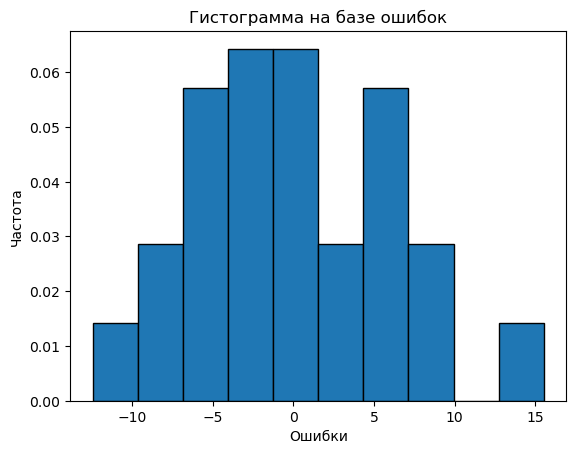

In [6]:
plt.hist(err, bins = np.arange(min(err), max(err) + h, h),edgecolor='black', density=True)
plt.title('Гистограмма на базе ошибок')
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.show()

Проверка гипотезы нормальности по $\chi^2$

In [7]:
from scipy.stats import norm, chi2

#интервалы
inters = [[-np.inf, -7.5], [-7.5, -4], [-4, 0], [0, 4], [4, 7.5], [7.5, np.inf]]

#количество значений попавшее в интервалы
n_arr = []

res = 0
for inter in inters:
    temp_p = norm.cdf(inter[1], np.mean(err), s_2**(1/2)) - norm.cdf(inter[0], np.mean(err), s_2**(1/2))
    temp_n= len([x for x in err if inter[0] <= x < inter[1]])
    temp_np = temp_p * n
    temp = ((temp_n-temp_np)**2)/(temp_np)
    res += temp
    n_arr.append(round(temp_n, 2))
   

print("I: ",inters)
print("n: ", n_arr)

print("Значение критерия: ", res)
print("Критическое значение: ", chi2.ppf(1-alpha, len(inters)-1))

if res > chi2.ppf(1-alpha, len(inters)-1):
    print("Гипотеза отвергается")
else:
    print("Нет оснований отвергнуть гипотезу")


I:  [[-inf, -7.5], [-7.5, -4], [-4, 0], [0, 4], [4, 7.5], [7.5, inf]]
n:  [5, 9, 12, 7, 11, 6]
Значение критерия:  4.564662611322833
Критическое значение:  15.08627246938899
Нет оснований отвергнуть гипотезу


Оценка расстояния до класса нормальных распределений по Колмогорову

In [8]:
from scipy.stats import kstest, kstwobign

def cdf(x):
    return norm.cdf(x, np.mean(err), s_2**(1/2))
    
Dn, _ = kstest(err, cdf)
res = n**(1/2) * Dn

print("Значение критерия: ", res)
print("Критическое значение: ", kstwobign.ppf(1-alpha))

if res > kstwobign.ppf(1-alpha):
    print("Гипотеза отвергается")
else:
    print("Нет оснований отвергнуть гипотезу")

Значение критерия:  0.6326927742088945
Критическое значение:  1.6276236115189502
Нет оснований отвергнуть гипотезу


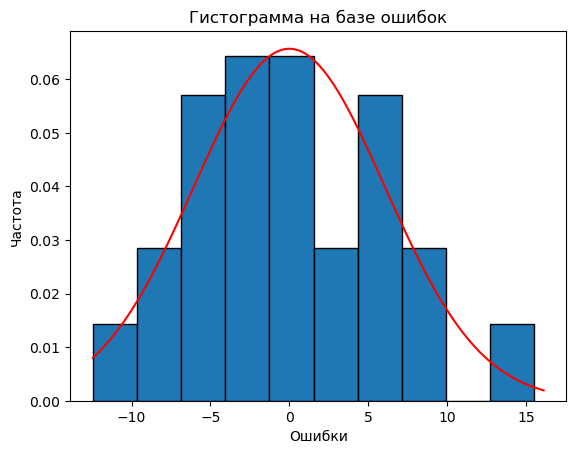

In [9]:
plt.hist(err, bins = np.arange(min(err), max(err) + h, h),edgecolor='black', density=True)
plt.title('Гистограмма на базе ошибок')
plt.xlabel('Ошибки')
plt.ylabel('Частота')

line = np.linspace(min(err), max(err)+h, 100)
plt.plot(line, norm.pdf(line, np.mean(err), s_2**(1/2)), color='red')

plt.show()

Некоторая схожесть наблюдается

3. В предположении нормальности ошибок построить доверительный интервал для параметров $\beta_0,\beta_1$ уровня доверия $1-\alpha$. Построить доверительный эллипс уровня доверия $1-\alpha$ для ($\beta_0,\beta_1$) (вычислить его полуоси).

Доверительный интервал

$\psi = C^{\intercal}\beta$

$\widehat{\psi} = C^{\intercal}\widehat{\beta}$

$\beta_0$: $C = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$

$\beta_1$: $C = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$

$b_{\psi} =  C^{\intercal} \left(XX^{\intercal}\right)^{-1}C$

$\Large \frac{\widehat{\psi} - \psi}{s\sqrt{b}} \normalsize \sim S_{n-r}$

$x_{\alpha}: \mathrm{S}_{n-r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$

$\left[\widehat{\psi} - x_{\alpha}s\sqrt{b}, \widehat{\psi} + x_{\alpha}s\sqrt{b}\right] \ni \psi$


In [10]:
from scipy.stats import t

x_alpha = t.ppf(1 - alpha/2, n-r)

C = np.array([1, 0])
b = np.dot(np.dot(C.transpose(), la.inv(np.dot(Xm, Xm.transpose()))), C)
psi = np.matmul(C.transpose(), beta)
dif = x_alpha * np.sqrt(s_2 + b)
print("beta_0: ", [psi - dif, psi + dif])

C = np.array([0, 1])
b = np.dot(np.dot(C.transpose(), la.inv(np.dot(Xm, Xm.transpose()))), C)
psi = np.matmul(C.transpose(), beta)
dif = x_alpha * np.sqrt(s_2 + b)
print("beta_1: ", [psi - dif, psi + dif])

beta_0:  [-11.877726113706466, 20.84353538754717]
beta_1:  [-14.661521630757235, 17.9105155065228]


Доверительный эллипс

$\large \frac{\left(\widehat{\psi} - \psi\right)^{\intercal}B^{-1}\left(\widehat{\psi} - \psi\right)}{qs^2} \normalsize \sim \mathcal{F}_{q, n - r}$

$x_{\alpha} : \mathrm{F}_{q, n - r}(x_{\alpha}) = 1 - \alpha $

$B = C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$

$A_{\alpha} = \left\{\vec{x} : \left(\vec{x} - \widehat{\psi}\right)^{\intercal}B^{-1} \left(\vec{x} - \widehat{\psi}\right) \leq qs^2x_{\alpha}\right\}$

$C = \begin{pmatrix}1 & 0 \\ 0 & 1\end{pmatrix}$

$\begin{pmatrix} x \\ y \end{pmatrix} = P\left(\widehat{\psi} - \psi\right)$ , где $P$ - матрица собственных векторов матрицы $XX^{\intercal}$.

$\left(\widehat{\psi} - \psi\right)^{\intercal}B^{-1}\left(\widehat{\psi} - \psi\right) = \lambda_1x^2 + \lambda_2y^2 \leq qs^2x_{\alpha}$

$\large \frac{\lambda_1x^2}{qs^2x_{\alpha}} + \frac{\lambda_2y^2}{qs^2x_{\alpha}} \normalsize \leq 1$, где $q = 2$


Полуоси
а = 11.71778238753314
b = 0.5453228028033005


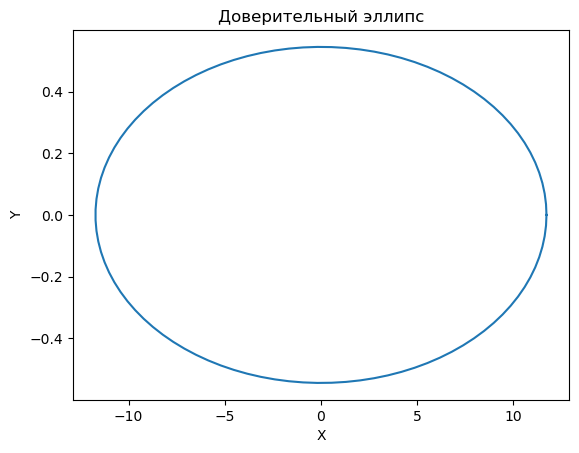

In [11]:
from scipy.stats import f
vals, vecs = la.eig(np.dot(Xm, Xm.transpose()))

q = 2
x_alpha = f.ppf(1 - alpha, q, n - r)

print("Полуоси")

a = 1/((vals[0] / (q*s_2*x_alpha))**(1/2))
print('а =', a)

b = 1/((vals[1] / (q*s_2*x_alpha))**(1/2))
print('b =', b)

theta = np.linspace(0, 2*np.pi, 100)

x = a * np.cos(theta)
y = b * np.sin(theta)

plt.figure()
plt.plot(x, y)  
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Доверительный эллипс')
plt.show()

4. Сформулировать гипотезу независимости переменной $Y$ от переменной $X$. Провести проверку значимости. 

$H_0: \beta_1 = 0$

$H_A: \beta_1 \neq 0$

$\mathbb{F}$-статистика: $\mathbb{F} =\large \frac{SS_н}{q} \cdot \frac{n - r}{SS_e} \normalsize = \large \frac{\widehat{\psi}^{\intercal}B^{-1}\widehat{\psi}}{qs^2} \sim \mathcal{F}_{q, n - r}$ ,

$B = C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$

$C = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$.

$\widehat{\psi} = C^{\intercal}\widehat{\beta} = \widehat{\beta_1}\Rightarrow \mathbb{F} = \large \frac{\widehat{\beta_1}^2}{bqs^2}$

$x_{\alpha}: \mathrm{F}(x_{\alpha}) = 1 - \alpha $

In [12]:
x_alpha = f.ppf(1-alpha, q, n-r)

C = np.array([0, 1])
b = np.dot(np.dot(C.transpose(), la.inv(np.dot(Xm, Xm.transpose()))), C)
res = beta[1]**2 / (b*1*s_2)

print("Значение критерия: ", res)
print("Критическое значение: ", f.ppf(1-alpha, 1, n-r))

if res > f.ppf(1-alpha, 1, n-r):
    print("Гипотеза отвергается")
else:
    print("Нет оснований отвергнуть гипотезу")

Значение критерия:  4.910897225480005
Критическое значение:  7.194218442187959
Нет оснований отвергнуть гипотезу


5. Сформулироывать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметрова $\beta_0, \beta_1, \beta_2$. Изобразить графически полученную регрессионную модель.

$Y = \beta_0 + \beta_1X  + \beta_2X^2 + \varepsilon$

 $ X X^{\intercal} \beta = X Y \Rightarrow \hat{\beta} = (X X^{\intercal})^{-1} XY $

In [13]:
X_2 = [x**2 for x in X]

Xm = np.array([[1]*50, X, X_2])

beta = np.dot(la.inv(np.dot(Xm, Xm.transpose())), np.dot(Xm, Y))

print(round(beta[0], 10))
print(round(beta[1], 10))
print(round(beta[2], 10))

-6.6680630631
6.5478303303
-0.5112537538


$ \hat{\beta} = \left(\begin{array}{c} \hat\beta_0 \\ \hat\beta_1 \\ \hat\beta_2 \end{array} \right) = \left(\begin{array}{c} -6.6680630631 \\ 6.5478303303 \\ -0.5112537538 \end{array} \right) \Rightarrow Y \approx-6.6680630631 + 6.5478303303X -0.5112537538X^2$

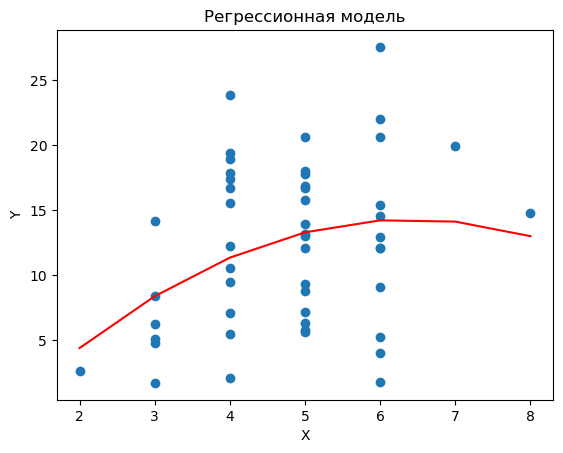

In [14]:
plt.title('Регрессионная модель')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X, Y)

def Y_v(x):
    return beta[0] + beta[1] * x + beta[2] * x**2
X_v = np.unique(X)
plt.plot(X_v, Y_v(X_v), color ='red')
plt.show()

6. Построить несмещенную оценку дисперсии. провести исследование нормальности ошибок как в пункте 2.

Несмещенная оценка дисперсии

In [15]:
r = la.matrix_rank(Xm)

err = Y - np.dot(Xm.transpose(), beta)
err_t = err.transpose()
s_2 = np.dot(err_t, err) / (n - r)

print(s_2)

36.587342946137625


Гистограмма на базе ошибок

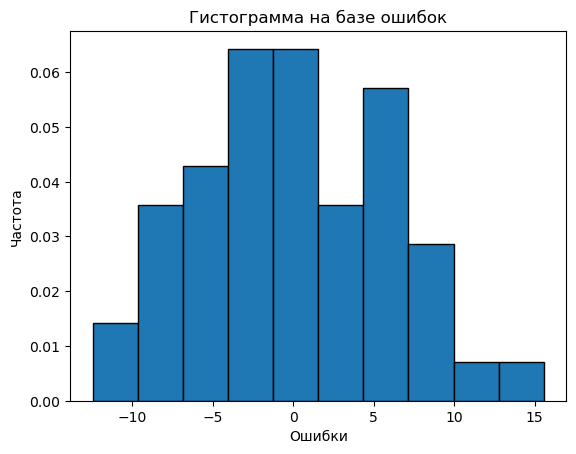

In [16]:
plt.hist(err, bins = np.arange(min(err), max(err) + h, h),edgecolor='black', density=True)
plt.title('Гистограмма на базе ошибок')
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.show()

Проверка гипотезы нормальности по $\chi^2$

In [17]:
#интервалы
inters = [[-np.inf, -7.5], [-7.5, -4], [-4, 0], [0, 4], [4, 7.5], [7.5, np.inf]]

#количество значений попавшее в интервалы
n_arr = []

res = 0
for inter in inters:
    temp_p = norm.cdf(inter[1], np.mean(err), s_2**(1/2)) - norm.cdf(inter[0], np.mean(err), s_2**(1/2))
    temp_n= len([x for x in err if inter[0] <= x < inter[1]])
    temp_np = temp_p * n
    temp = ((temp_n-temp_np)**2)/(temp_np)
    res += temp
    n_arr.append(round(temp_n, 2))
   

print("I: ",inters)
print("n: ", n_arr)

print("Значение критерия: ", res)
print("Критическое значение: ", chi2.ppf(1-alpha, len(inters)-1))

if res > chi2.ppf(1-alpha, len(inters)-1):
    print("Гипотеза отвергается")
else:
    print("Нет оснований отвергнуть гипотезу")

I:  [[-inf, -7.5], [-7.5, -4], [-4, 0], [0, 4], [4, 7.5], [7.5, inf]]
n:  [6, 7, 14, 8, 10, 5]
Значение критерия:  2.817233840548758
Критическое значение:  15.08627246938899
Нет оснований отвергнуть гипотезу


Оценка расстояния до класса нормальных распределений по Колмогорову

In [18]:
from scipy.stats import kstest, kstwobign

def cdf(x):
    return norm.cdf(x, np.mean(err), s_2**(1/2))
    
Dn, _ = kstest(err, cdf)
res = n**(1/2) * Dn

print("Значение критерия: ", res)
print("Критическое значение: ", kstwobign.ppf(1-alpha))

if res > kstwobign.ppf(1-alpha):
    print("Гипотеза отвергается")
else:
    print("Нет оснований отвергнуть гипотезу")

Значение критерия:  0.4077053484843685
Критическое значение:  1.6276236115189502
Нет оснований отвергнуть гипотезу


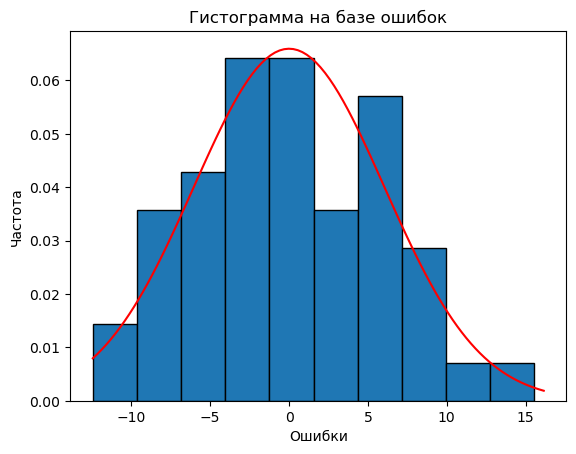

In [19]:
plt.hist(err, bins = np.arange(min(err), max(err) + h, h),edgecolor='black', density=True)
plt.title('Гистограмма на базе ошибок')
plt.xlabel('Ошибки')
plt.ylabel('Частота')

line = np.linspace(min(err), max(err)+h, 100)
plt.plot(line, norm.pdf(line, np.mean(err), s_2**(1/2)), color='red')

plt.show()

Наблюдается явная схожесть

7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0, \beta_1, \beta_2$ уровня доверия $1 - \alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1 - \alpha$.

Доверительный интервал

$\psi = C^{\intercal}\beta$

$\widehat{\psi} = C^{\intercal}\widehat{\beta}$

$\beta_0$: $C = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}$

$\beta_1$: $C = \begin{pmatrix} 0 \\ 1 \\ 0\end{pmatrix}$

$\beta_2$: $C = \begin{pmatrix} 0 \\ 0 \\ 1\end{pmatrix}$

$b_{\psi} =  C^{\intercal} \left(XX^{\intercal}\right)^{-1}C$

$\Large \frac{\widehat{\psi} - \psi}{s\sqrt{b}} \normalsize \sim S_{n-r}$

$x_{\alpha}: \mathrm{S}_{n-r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$

$\left[\widehat{\psi} - x_{\alpha}s\sqrt{b}, \widehat{\psi} + x_{\alpha}s\sqrt{b}\right] \ni \psi$

In [20]:
from scipy.stats import t

x_alpha = t.ppf(1 - alpha/2, n-r)

C = np.array([1, 0, 0])
b = np.dot(np.dot(C.transpose(), la.inv(np.dot(Xm, Xm.transpose()))), C)
psi = np.matmul(C.transpose(), beta)
dif = x_alpha * np.sqrt(s_2 + b)
print("beta_0: ", [psi - dif, psi + dif])

C = np.array([0, 1, 0])
b = np.dot(np.dot(C.transpose(), la.inv(np.dot(Xm, Xm.transpose()))), C)
psi = np.matmul(C.transpose(), beta)
dif = x_alpha * np.sqrt(s_2 + b)
print("beta_1: ", [psi - dif, psi + dif])

C = np.array([0, 0, 1])
b = np.dot(np.dot(C.transpose(), la.inv(np.dot(Xm, Xm.transpose()))), C)
psi = np.matmul(C.transpose(), beta)
dif = x_alpha * np.sqrt(s_2 + b)
print("beta_2: ", [psi - dif, psi + dif])

beta_0:  [-23.53177022798885, 10.195644101864978]
beta_1:  [-9.80222428576063, 22.897884946421172]
beta_2:  [-16.750627494449137, 15.728119986941639]


Доверительный эллипсоид 


$\large \frac{\left(\widehat{\psi} - \psi\right)^{\intercal}B^{-1}\left(\widehat{\psi} - \psi\right)}{qs^2} \normalsize \sim \mathcal{F}_{q, n - r}$

$B = C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$

$A_{\alpha} = \left\{\vec{x} : \left(\vec{x} - \widehat{\psi}\right)^{\intercal}B^{-1} \left(\vec{x} - \widehat{\psi}\right) \leq qs^2x_{\alpha}\right\}$

$C = \begin{pmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{pmatrix}$

$\begin{pmatrix} x \\ y \\ z\end{pmatrix} = P\left(\widehat{\psi} - \psi\right)$ , где $P$ - матрица собственных векторов матрицы $XX^{\intercal}$.

$\left(\widehat{\psi} - \psi\right)^{\intercal}B^{-1}\left(\widehat{\psi} - \psi\right) = \lambda_1x^2 + \lambda_2y^2 + \lambda_3z^2 \leq qs^2x_{\alpha}$

Полуоси
а = 0.10019636355922999
b = 35.404210390671395
c = 35.404210390671395


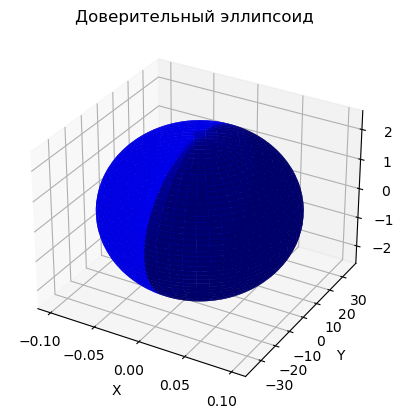

In [21]:
from scipy.stats import f
vals, vecs = la.eig(np.dot(Xm, Xm.transpose()))

q = 2
x_alpha = f.ppf(1 - alpha, q, n - r)

print("Полуоси")
a = 1/((vals[0] / (q*s_2*x_alpha))**(1/2))
print('а =', a)

b = 1/((vals[1] / (q*s_2*x_alpha))**(1/2))
print('b =', b)

c = 1/((vals[2] / (q*s_2*x_alpha))**(1/2))
print('c =', b)

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)


x = a * np.outer(np.cos(u), np.sin(v))
y = b * np.outer(np.sin(u), np.sin(v))
z = c * np.outer(np.ones(np.size(u)), np.cos(v))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Доверительный эллипсоид')
plt.show()

8. Сформулировать гипотезу линейной регрессионной зависимости переменной $Y$ от переменной $X$ и проаерить ее значимость на уровне $\alpha$.

$H_0: \beta_2 = 0$

$H_A: \beta_2 \neq 0$

$\mathbb{F}$-статистика: $\mathbb{F} =\large \frac{SS_н}{q} \cdot \frac{n - r}{SS_e} \normalsize = \large \frac{\widehat{\psi}^{\intercal}B^{-1}\widehat{\psi}}{qs^2} \sim \mathcal{F}_{q, n - r}$ ,

$B = C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$

$C = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}$.

$\widehat{\psi} = C^{\intercal}\widehat{\beta} = \widehat{\beta_2}\Rightarrow \mathbb{F} = \large \frac{\widehat{\beta_2}^2}{bqs^2}$

$x_{\alpha}: \mathrm{F}(x_{\alpha}) = 1 - \alpha $

In [22]:
x_alpha = f.ppf(1-alpha, q, n-r)

C = np.array([0, 0, 1])
b = np.dot(np.dot(C.transpose(), la.inv(np.dot(Xm, Xm.transpose()))), C)
res = beta[2]**2 / (b*1*s_2)

print("Значение критерия: ", res)
print("Критическое значение: ", f.ppf(1-alpha, 1, n-r))

if res > f.ppf(1-alpha, 1, n-r):
    print("Гипотеза отвергается")
else:
    print("Нет оснований отвергнуть гипотезу")

Значение критерия:  1.3486993780481016
Критическое значение:  7.2068388654187014
Нет оснований отвергнуть гипотезу


## Выводы

В ходе выполнения практической работы были изучены: основные положения метода наименьших квадратов (МНК), статистические свойства МНК-оценок, понятие функции регрессии и роль МНК в регрессионном анализе.

Были построены: линейная регрессионная модель переменной $Y$ по переменной $X$, несмещенная оценка дисперсии, гипотеза нормальности ошибок по $\chi^2$, оценка расстояния полученной оценки до класса нормальных распределений по Колмогорову, доверительные интервалы, эллипс и эллипсоид для параметров моделей, гипотеза независимости переменной Y от переменной X.